In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

### Load, look at, and clean data

In [2]:
with open("ultimate_data_challenge.json", 'r') as f:
    data = json.load(f)

In [3]:
len(data)

50000

In [4]:
data[0].keys()

dict_keys(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver', 'avg_surge', 'last_trip_date', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])

In [5]:
df = pd.DataFrame(data)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
df.shape

(50000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


#### Find duplicates

In [8]:
dupes = df[df.duplicated(keep='first')].sort_values(by='avg_dist').index

In [9]:
len(dupes)

8

In [10]:
df = df.drop(index=dupes).reset_index(drop=True)

In [11]:
df.shape

(49992, 12)

#### Dealing with missing values

In [12]:
df[df.isna().any(axis=1)]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49976,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49977,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49981,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49988,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


Dealing with missing phone type is easiest.

In [13]:
sum(df.phone.isna())

396

In [14]:
df['phone'].fillna('_other', inplace=True)
df['phone'] = df.phone.apply(lambda x: x.lower())

In [15]:
df.phone.unique()

array(['iphone', 'android', '_other'], dtype=object)

Average rating of driver by customer

In [16]:
sum(df.avg_rating_of_driver.isna())

8119

In [17]:
np.nanmean(df.avg_rating_of_driver)

4.60151171399231

In [18]:
np.nanmedian(df.avg_rating_of_driver)

4.9

In [19]:
np.histogram(df.avg_rating_of_driver, np.arange(1,6))

(array([  266,   435,  3111, 38061], dtype=int64), array([1, 2, 3, 4, 5]))

In [20]:
df.avg_rating_of_driver.min(), df.avg_rating_of_driver.max()

(1.0, 5.0)

In [21]:
df[pd.isnull(df.avg_rating_of_driver)==True]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iphone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49976,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,android,0.0,False,0.0,3.50,5.0
49977,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,android,0.0,False,100.0,1.38,5.0
49981,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iphone,0.0,False,100.0,0.00,5.0
49988,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iphone,0.0,False,0.0,0.00,4.0


In [22]:
df[pd.isnull(df.avg_rating_of_driver)==True].avg_dist.value_counts()

0.00     77
1.91     21
1.37     19
3.07     19
3.59     19
         ..
20.58     1
21.13     1
26.74     1
19.98     1
33.40     1
Name: avg_dist, Length: 2152, dtype: int64

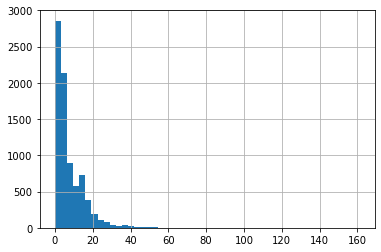

In [23]:
df[pd.isnull(df.avg_rating_of_driver)==True].avg_dist.hist(bins=50)
plt.show()

There doesn't seem to be anything indicating broader disengagement from using the product among riders who never rate their drivers. So it seems important to keep the information that they actually did not rate the drivers instead of imputing a value to fill the missing numbers with. 

In [24]:
df['has_rated_driver'] = df.avg_rating_of_driver.apply(lambda x: pd.isnull(x)==False)

In [25]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,has_rated_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iphone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,android,0.0,False,50.0,8.26,5.0,True
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iphone,0.0,False,100.0,0.77,5.0,True
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iphone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,android,11.8,False,82.4,3.13,4.9,True


for now I will keep the Nans in the avg_rating_of_driver column

Average rating of customer by driver

In [26]:
sum(df.avg_rating_by_driver.isna())

201

In [27]:
np.nanmean(df.avg_rating_by_driver)

4.778122552268482

In [28]:
np.nanmedian(df.avg_rating_by_driver)

5.0

In [29]:
df.avg_rating_by_driver.min(), df.avg_rating_by_driver.max()

(1.0, 5.0)

In [30]:
np.histogram(df.avg_rating_by_driver, np.arange(1,6))

(array([  185,   163,  1221, 48222], dtype=int64), array([1, 2, 3, 4, 5]))

In [31]:
df[pd.isnull(df.avg_rating_by_driver)==True]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,has_rated_driver
90,Winterfell,1,2014-01-10,5.0,1.0,2014-02-09,iphone,0.0,False,0.0,6.28,NaN,True
274,Astapor,1,2014-01-25,2.0,4.0,2014-02-09,iphone,100.0,False,0.0,6.00,NaN,True
277,Winterfell,1,2014-01-25,NaN,1.0,2014-01-26,iphone,0.0,False,0.0,1.82,NaN,False
536,Winterfell,1,2014-01-18,5.0,1.0,2014-02-08,android,0.0,False,100.0,1.41,NaN,True
857,Winterfell,0,2014-01-11,4.0,1.0,2014-03-16,iphone,0.0,False,0.0,0.42,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49241,King's Landing,0,2014-01-14,5.0,1.0,2014-06-19,iphone,0.0,True,100.0,4.60,NaN,True
49368,Astapor,1,2014-01-20,4.0,1.0,2014-01-24,iphone,0.0,False,100.0,3.01,NaN,True
49496,Winterfell,2,2014-01-24,5.0,1.0,2014-01-25,android,0.0,False,100.0,0.75,NaN,True
49591,King's Landing,1,2014-01-14,5.0,1.0,2014-02-08,iphone,0.0,False,100.0,2.48,NaN,True


In [32]:
np.median(df.avg_rating_by_driver.fillna(4.7))

5.0

it looks like replacing the missing values with the mean value doesn't change the median, and since a missing rating of the customer isn't an action the customer did or didn't take, it seems fine to just fill these in with the mean. 

In [33]:
df.avg_rating_by_driver.fillna(4.7, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49992 entries, 0 to 49991
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49992 non-null  object 
 1   trips_in_first_30_days  49992 non-null  int64  
 2   signup_date             49992 non-null  object 
 3   avg_rating_of_driver    41873 non-null  float64
 4   avg_surge               49992 non-null  float64
 5   last_trip_date          49992 non-null  object 
 6   phone                   49992 non-null  object 
 7   surge_pct               49992 non-null  float64
 8   ultimate_black_user     49992 non-null  bool   
 9   weekday_pct             49992 non-null  float64
 10  avg_dist                49992 non-null  float64
 11  avg_rating_by_driver    49992 non-null  float64
 12  has_rated_driver        49992 non-null  bool   
dtypes: bool(2), float64(6), int64(1), object(4)
memory usage: 4.3+ MB


In [35]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,49992.000000,41873.000000,49992.000000,49992.000000,49992.000000,49992.00000,49992.000000
mean,2.278405,4.601512,1.074776,8.850952,60.929833,5.79726,4.777808
std,3.792953,0.617360,0.222352,19.960094,37.078229,5.70761,0.445807
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.42000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.88000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.94000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.96000,5.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49992 entries, 0 to 49991
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49992 non-null  object 
 1   trips_in_first_30_days  49992 non-null  int64  
 2   signup_date             49992 non-null  object 
 3   avg_rating_of_driver    41873 non-null  float64
 4   avg_surge               49992 non-null  float64
 5   last_trip_date          49992 non-null  object 
 6   phone                   49992 non-null  object 
 7   surge_pct               49992 non-null  float64
 8   ultimate_black_user     49992 non-null  bool   
 9   weekday_pct             49992 non-null  float64
 10  avg_dist                49992 non-null  float64
 11  avg_rating_by_driver    49992 non-null  float64
 12  has_rated_driver        49992 non-null  bool   
dtypes: bool(2), float64(6), int64(1), object(4)
memory usage: 4.3+ MB


In [37]:
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

### Explore the data

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


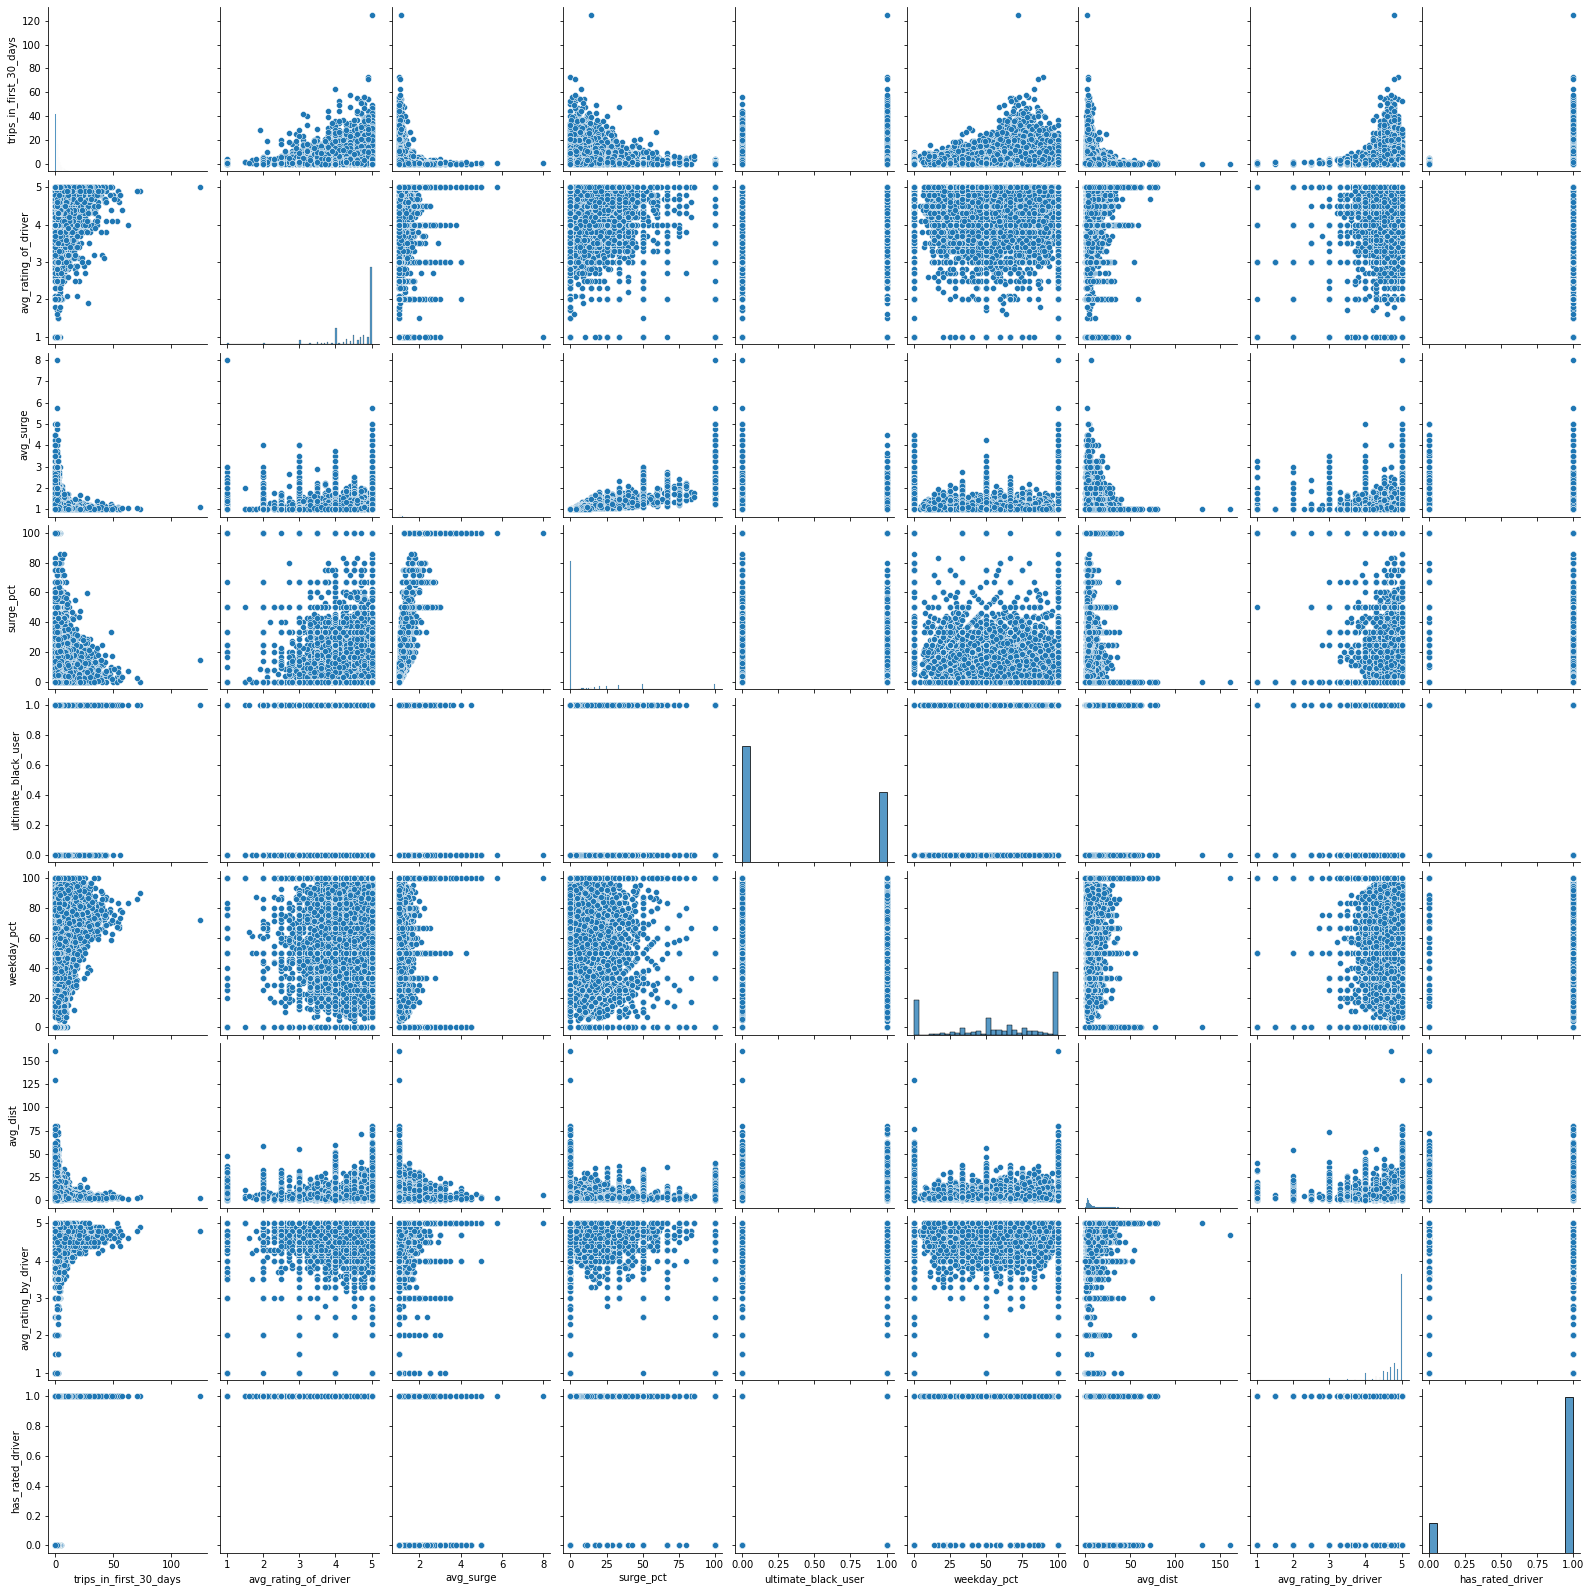

In [100]:
sns.pairplot(df)
plt.show()

#### Explore trips in "last" 30 days windows. 

In [38]:
df['signup_date'] = pd.to_datetime(df.signup_date)
df['last_trip_date'] = pd.to_datetime(df.last_trip_date)

In [39]:
df.signup_date.min(), df.signup_date.max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-01-31 00:00:00'))

In [40]:
df.last_trip_date.min(), df.last_trip_date.max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-07-01 00:00:00'))

In [41]:
df.last_trip_date.apply(lambda x: x.month).value_counts()

6    18256
1    10139
5     7585
4     4588
3     4568
2     4308
7      548
Name: last_trip_date, dtype: int64

In [42]:
first_day = df.signup_date.max().date()
last_day = df.last_trip_date.max().date()
bins = pd.date_range(first_day, last_day, freq="1d")

In [43]:
bins

DatetimeIndex(['2014-01-31', '2014-02-01', '2014-02-02', '2014-02-03',
               '2014-02-04', '2014-02-05', '2014-02-06', '2014-02-07',
               '2014-02-08', '2014-02-09',
               ...
               '2014-06-22', '2014-06-23', '2014-06-24', '2014-06-25',
               '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29',
               '2014-06-30', '2014-07-01'],
              dtype='datetime64[ns]', length=152, freq='D')

In [44]:
last_trip_count = np.histogram(df.last_trip_date, bins)

In [45]:
last_trip_count[0].shape, last_trip_count[1].shape

((151,), (152,))

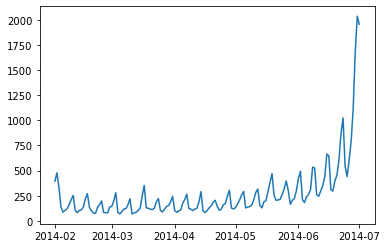

In [46]:
plt.plot(last_trip_count[1][1:], last_trip_count[0])
plt.show()

In [47]:
(df.last_trip_date[0].date() - df.signup_date[0].date()).days

143

In [48]:
df['days_active'] = df.apply(lambda row: (row['last_trip_date'].date() - row['signup_date'].date()).days, axis=1)

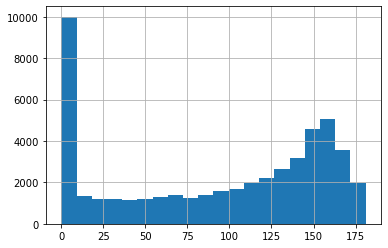

In [49]:
df['days_active'].hist(bins=20)
plt.show()

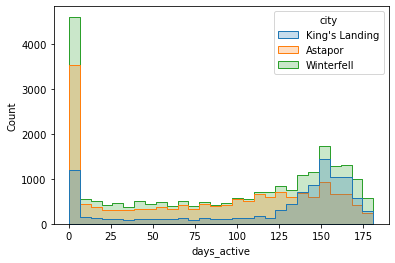

In [50]:
sns.histplot(data=df, x='days_active',
            hue='city', element='step')
plt.show()

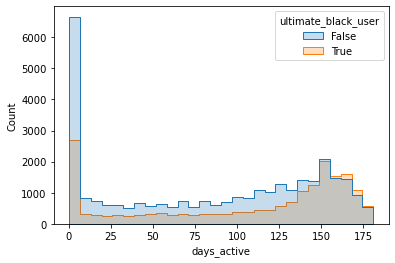

In [51]:
sns.histplot(data=df, x='days_active',
            hue='ultimate_black_user', element='step')
plt.show()

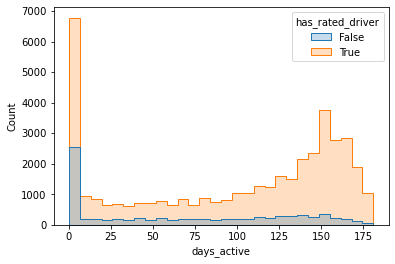

In [52]:
sns.histplot(data=df, x='days_active',
            hue='has_rated_driver', element='step')
plt.show()

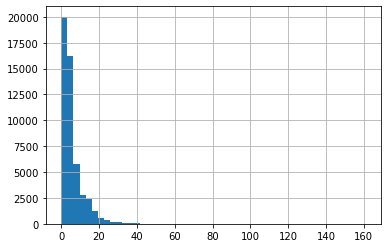

In [53]:
df['avg_dist'].hist(bins=50)
plt.show()

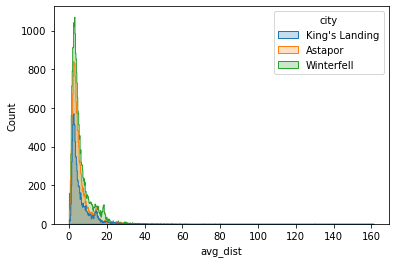

In [54]:
sns.histplot(data=df, x='avg_dist',
            hue='city', element='step')
plt.show()

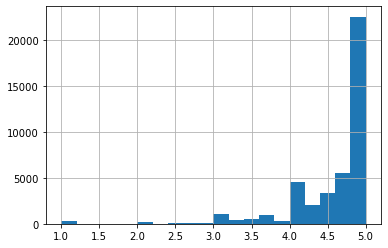

In [55]:
df['avg_rating_of_driver'].hist(bins=20)
plt.show()

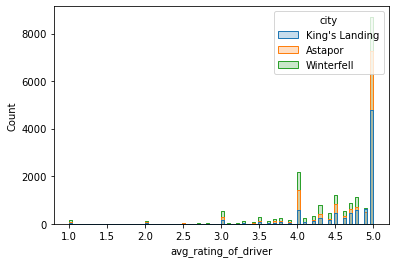

In [56]:
sns.histplot(data=df, x='avg_rating_of_driver',
            hue='city', element='step')
plt.show()

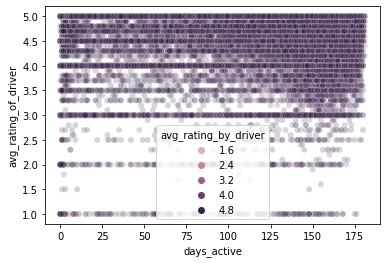

In [57]:
sns.scatterplot(data=df, x='days_active', y='avg_rating_of_driver',
               hue='avg_rating_by_driver', alpha=.2)

plt.show()

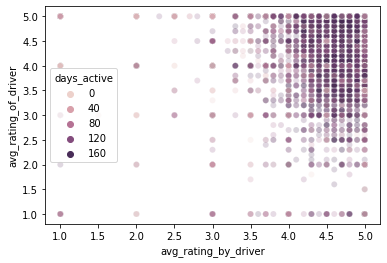

In [58]:
sns.scatterplot(data=df, x='avg_rating_by_driver', y='avg_rating_of_driver',
               hue='days_active', alpha=.2)

plt.show()

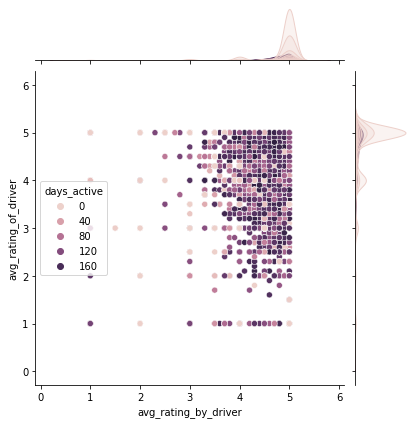

In [59]:
sns.jointplot(data=df, x=df['avg_rating_by_driver'], y=df['avg_rating_of_driver'],
             hue='days_active', 
#               kind='hex'
             )

plt.show()

In [60]:
df['date_inactive'] = df['last_trip_date'].apply(lambda x: x + timedelta(days=30))

In [61]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,has_rated_driver,days_active,date_inactive
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iphone,15.4,True,46.2,3.67,5.0,True,143,2014-07-17
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,android,0.0,False,50.0,8.26,5.0,True,96,2014-06-04
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iphone,0.0,False,100.0,0.77,5.0,True,1,2014-02-06
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iphone,20.0,True,80.0,2.36,4.9,True,170,2014-07-29
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,android,11.8,False,82.4,3.13,4.9,True,47,2014-04-14


In [62]:
df.days_active.max()

181

In [64]:
first_day = df.signup_date.min().date()
last_day = df.last_trip_date.max().date() + timedelta(days=6)
bins = pd.date_range(first_day, last_day, freq="7d")

In [65]:
bins

DatetimeIndex(['2014-01-01', '2014-01-08', '2014-01-15', '2014-01-22',
               '2014-01-29', '2014-02-05', '2014-02-12', '2014-02-19',
               '2014-02-26', '2014-03-05', '2014-03-12', '2014-03-19',
               '2014-03-26', '2014-04-02', '2014-04-09', '2014-04-16',
               '2014-04-23', '2014-04-30', '2014-05-07', '2014-05-14',
               '2014-05-21', '2014-05-28', '2014-06-04', '2014-06-11',
               '2014-06-18', '2014-06-25', '2014-07-02'],
              dtype='datetime64[ns]', freq='7D')

In [66]:
last_trips_weekly = np.histogram(df.last_trip_date, bins)
last_trips_weekly[0]

array([1260, 2056, 3121, 2739, 1992, 1033, 1075,  811,  991,  858, 1171,
        960, 1032, 1103, 1008, 1018, 1243, 1322, 1390, 1991, 1871, 2027,
       2383, 3004, 4346, 8187], dtype=int64)

In [67]:
went_inactive_weekly = np.histogram(df.date_inactive, bins)
went_inactive_weekly[0]

array([   0,    0,    0,    0,  904, 2033, 2609, 3113, 2288, 1068, 1026,
        882, 1002,  863, 1063, 1024, 1036, 1051, 1067,  950, 1247, 1301,
       1375, 1815, 1860, 2313], dtype=int64)

In [68]:
signups_weekly = np.histogram(df.signup_date, bins)
signups_weekly[0]

array([10030, 10632, 12190, 12372,  4768,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int64)

In [69]:
weekly_df = pd.DataFrame(index=bins[1:], data={'last_trips': last_trips_weekly[0],
                                              'signups': signups_weekly[0],
                                              'inactives': went_inactive_weekly[0]})
weekly_df.head()

,last_trips,signups,inactives
2014-01-08,1260,10030,0
2014-01-15,2056,10632,0
2014-01-22,3121,12190,0
2014-01-29,2739,12372,0
2014-02-05,1992,4768,904


In [70]:
weekly_df['active_user_count'] = np.cumsum(weekly_df.apply(lambda x: (x['signups'] - x['inactives']), axis=1))

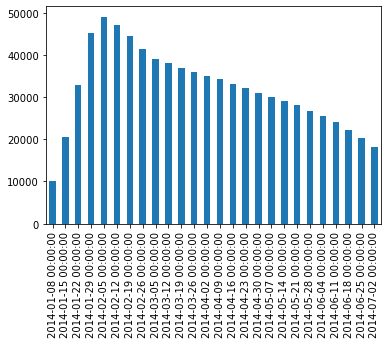

In [71]:
weekly_df['active_user_count'].plot(kind='bar')
plt.show()

#### Percent of observed users retained at end of observation period:

In [252]:
weekly_df.iloc[-1]

last_trips            8187
signups                  0
inactives             2313
active_user_count    18102
Name: 2014-07-02 00:00:00, dtype: int64

In [72]:
weekly_df['active_user_count'][-1] / len(df)

0.36209793566970716

### Data pre-processing for machine learning models

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49992 entries, 0 to 49991
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49992 non-null  object        
 1   trips_in_first_30_days  49992 non-null  int64         
 2   signup_date             49992 non-null  datetime64[ns]
 3   avg_rating_of_driver    41873 non-null  float64       
 4   avg_surge               49992 non-null  float64       
 5   last_trip_date          49992 non-null  datetime64[ns]
 6   phone                   49992 non-null  object        
 7   surge_pct               49992 non-null  float64       
 8   ultimate_black_user     49992 non-null  bool          
 9   weekday_pct             49992 non-null  float64       
 10  avg_dist                49992 non-null  float64       
 11  avg_rating_by_driver    49992 non-null  float64       
 12  has_rated_driver        49992 non-null  bool  

In [73]:
potential_target_columns = ['last_trip_date', 'days_active', 'date_inactive']

In [116]:
df_targets = df[potential_target_columns]
df_targets['active_in_month_6'] = df_targets.days_active.apply(lambda x: x >= 150)

In [164]:
df_targets

,last_trip_date,days_active,date_inactive,active_in_month_6
0,2014-06-17,143,2014-07-17,False
1,2014-05-05,96,2014-06-04,False
2,2014-01-07,1,2014-02-06,False
3,2014-06-29,170,2014-07-29,True
4,2014-03-15,47,2014-04-14,False
...,...,...,...,...
49987,2014-06-05,131,2014-07-05,False
49988,2014-01-25,1,2014-02-24,False
49989,2014-05-22,111,2014-06-21,False
49990,2014-01-15,1,2014-02-14,False


In [83]:
df_modeling = df.drop(columns=potential_target_columns)

In [84]:
df_modeling = pd.concat([df_modeling, pd.get_dummies(df.city, prefix='city', drop_first=True)], axis=1).drop(columns='city')

In [87]:
df_modeling = pd.concat([df_modeling, pd.get_dummies(df.phone, prefix='phone', drop_first=True)], axis=1).drop(columns='phone')

In [88]:
df_modeling.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,has_rated_driver,city_King's Landing,city_Winterfell,phone_android,phone_iphone
0,4,2014-01-25,4.7,1.10,15.4,True,46.2,3.67,5.0,True,1,0,0,1
1,0,2014-01-29,5.0,1.00,0.0,False,50.0,8.26,5.0,True,0,0,1,0
2,3,2014-01-06,4.3,1.00,0.0,False,100.0,0.77,5.0,True,0,0,0,1
3,9,2014-01-10,4.6,1.14,20.0,True,80.0,2.36,4.9,True,1,0,0,1
4,14,2014-01-27,4.4,1.19,11.8,False,82.4,3.13,4.9,True,0,1,1,0


In [98]:
df_modeling['signup_day'] = df_modeling.signup_date.apply(lambda x: x.day)
df_modeling.drop(columns='signup_date', inplace=True)

In [99]:
df_modeling.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,has_rated_driver,city_King's Landing,city_Winterfell,phone_android,phone_iphone,signup_day
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,True,1,0,0,1,25
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,True,0,0,1,0,29
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,True,0,0,0,1,6
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,True,1,0,0,1,10
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,True,0,1,1,0,27


In [101]:
df_modeling['ultimate_black_user'] = df_modeling['ultimate_black_user'].astype(int)
df_modeling['has_rated_driver'] = df_modeling['has_rated_driver'].astype(int)

In [102]:
df_modeling.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,has_rated_driver,city_King's Landing,city_Winterfell,phone_android,phone_iphone,signup_day
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,1,0,0,1,25
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,1,0,0,1,0,29
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,1,0,0,0,1,6
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,1,0,0,1,10
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,1,0,1,1,0,27


In [107]:
#a lot of the models will not like the Nans I left so I will fill them with a completely different number for the people 
#who did not rate any drivers.
df_modeling['avg_rating_of_driver'].fillna(-99, inplace=True)

In [108]:
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49992 entries, 0 to 49991
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  49992 non-null  int64  
 1   avg_rating_of_driver    49992 non-null  float64
 2   avg_surge               49992 non-null  float64
 3   surge_pct               49992 non-null  float64
 4   ultimate_black_user     49992 non-null  int32  
 5   weekday_pct             49992 non-null  float64
 6   avg_dist                49992 non-null  float64
 7   avg_rating_by_driver    49992 non-null  float64
 8   has_rated_driver        49992 non-null  int32  
 9   city_King's Landing     49992 non-null  uint8  
 10  city_Winterfell         49992 non-null  uint8  
 11  phone_android           49992 non-null  uint8  
 12  phone_iphone            49992 non-null  uint8  
 13  signup_day              49992 non-null  int64  
dtypes: float64(6), int32(2), int64(2), uin

In [109]:
df_modeling.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,has_rated_driver,city_King's Landing,city_Winterfell,phone_android,phone_iphone,signup_day
count,49992.000000,49992.000000,49992.000000,49992.000000,49992.00000,49992.000000,49992.00000,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000,49992.000000
mean,2.278405,-12.223994,1.074776,8.850952,0.37708,60.929833,5.79726,4.777808,0.837594,0.202632,0.466695,0.300408,0.691671,16.545047
std,3.792953,38.215162,0.222352,19.960094,0.48466,37.078229,5.70761,0.445807,0.368827,0.401965,0.498895,0.458440,0.461808,8.754537
min,0.000000,-99.000000,1.000000,0.000000,0.00000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,1.000000,0.000000,0.00000,33.300000,2.42000,4.700000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,1.000000,4.700000,1.000000,0.000000,0.00000,66.700000,3.88000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,17.000000
75%,3.000000,5.000000,1.050000,8.600000,1.00000,100.000000,6.94000,5.000000,1.000000,0.000000,1.000000,1.000000,1.000000,24.000000
max,125.000000,5.000000,8.000000,100.000000,1.00000,100.000000,160.96000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000


#### Perform KMeans clustering to see if there's any patterns I missed

In [105]:
from sklearn.cluster import KMeans

In [110]:
sum_of_squares = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(df_modeling.values)
    sum_of_squares.append(km.inertia_)

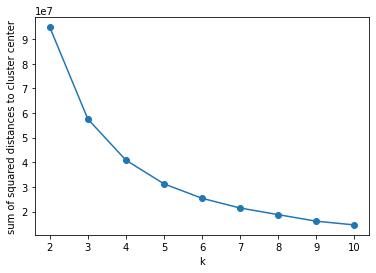

In [112]:
fig, ax = plt.subplots()
ax.plot(K, sum_of_squares, 'o-')
ax.set_ylabel('sum of squared distances to cluster center')
ax.set_xlabel('k')
plt.show()

In [136]:
nclus = 5
km = KMeans(n_clusters=nclus, random_state=0)
clusters = km.fit_predict(df_modeling.values)

In [165]:
df_kmeans = df_modeling.copy()
df_kmeans['clusters'] = clusters
df_kmeans = pd.concat([df_kmeans, df_targets], axis=1)

In [166]:
df_kmeans.groupby('clusters').mean()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,has_rated_driver,city_King's Landing,city_Winterfell,phone_android,phone_iphone,signup_day,days_active,active_in_month_6
clusters,,,,,,,,,,,,,,,,
0,2.263109,4.622240,1.049004,5.683358,0.379420,95.049178,6.380154,4.794362,1.0,0.217932,0.449567,0.308519,0.683236,16.585448,86.836885,0.218919
1,1.359294,4.603129,1.119048,13.866916,0.318397,5.764592,5.292796,4.783073,1.0,0.177217,0.464557,0.328473,0.666904,16.427098,74.748459,0.168682
2,0.579097,-99.000000,1.054899,5.866158,0.352607,98.782239,8.254226,4.799062,0.0,0.162775,0.482871,0.349116,0.639101,16.960506,65.928213,0.110190
3,0.611425,-99.000000,1.108490,12.031335,0.316176,7.577149,6.540512,4.767223,0.0,0.151867,0.490950,0.363688,0.624434,16.874434,67.467760,0.115385
4,3.616552,4.578657,1.077379,9.755488,0.425321,54.330316,4.584213,4.753793,1.0,0.221941,0.476135,0.249630,0.743032,16.374260,121.656882,0.407499


In [167]:
df_kmeans.groupby('clusters').median()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,has_rated_driver,city_King's Landing,city_Winterfell,phone_android,phone_iphone,signup_day,days_active,active_in_month_6
clusters,,,,,,,,,,,,,,,,
0,1,5.0,1.00,0.0,0,100.0,4.21,5.0,1,0,0,0,1,17,99,False
1,1,5.0,1.00,0.0,0,0.0,3.62,5.0,1,0,0,0,1,18,72,False
2,1,-99.0,1.00,0.0,0,100.0,5.20,5.0,0,0,0,0,1,17,58,False
3,1,-99.0,1.00,0.0,0,0.0,4.16,5.0,0,0,0,0,1,18,59,False
4,2,4.8,1.01,2.9,0,53.3,3.57,4.8,1,0,0,0,1,17,142,False


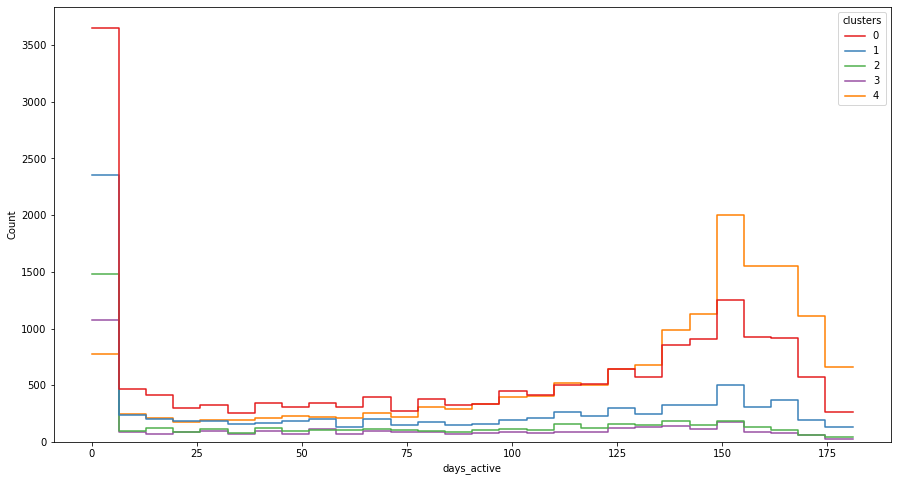

In [149]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data=df_kmeans, x='days_active',
               hue='clusters', element='step', palette='Set1',
            fill=False)
plt.show()

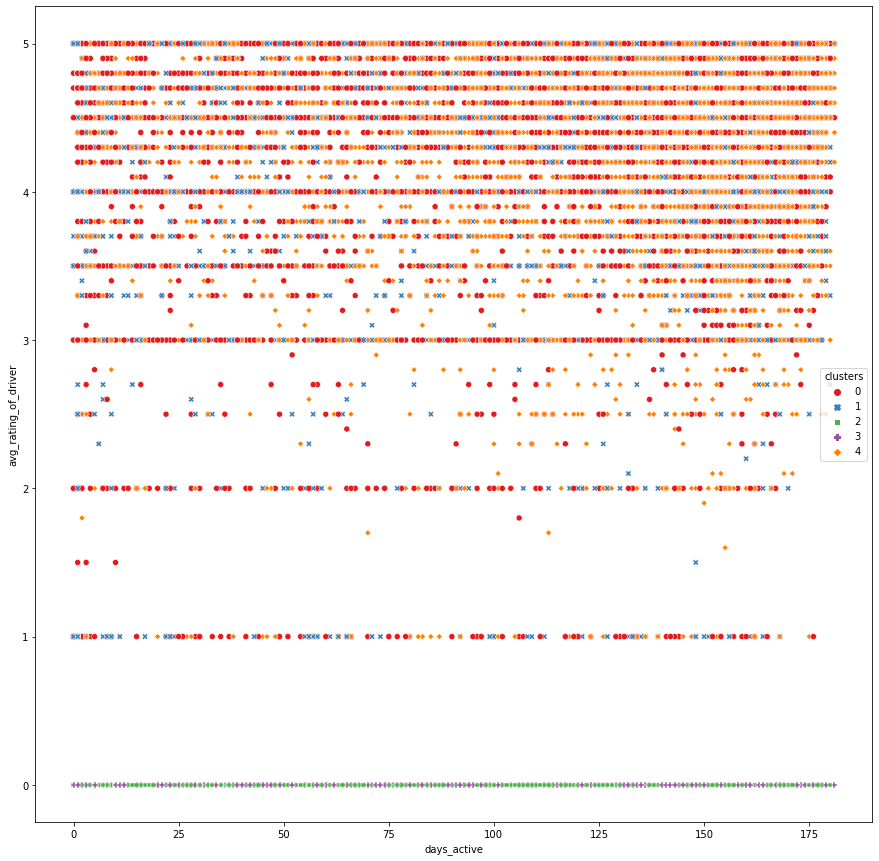

In [144]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(data=df_kmeans, x='days_active', y=df_kmeans['avg_rating_of_driver'].replace({-99:0}),
               style='clusters', hue='clusters', palette='Set1')
plt.show()

based on the above two plots, there is absolutely a difference in the clusters in terms of time active. clusters 0 and 4 have the highest retention, while clusters 2 and 3 have the lowest. Cluster 1 seems to be a mixture. 

Other than the has rated driver category, there are no obvious differences (so far) between the different groups.

In [168]:
bool_categories = df_kmeans.groupby('clusters').sum()[['ultimate_black_user', 'has_rated_driver', "city_King's Landing", 
                                                       "city_Winterfell", 'phone_android', 'phone_iphone', 'active_in_month_6']]
bool_categories

,ultimate_black_user,has_rated_driver,city_King's Landing,city_Winterfell,phone_android,phone_iphone,active_in_month_6
clusters,,,,,,,
0,6534,17221,3753.0,7742.0,5313.0,11766.0,3770
1,2686,8436,1495.0,3919.0,2771.0,5626.0,1423
2,1616,0,746.0,2213.0,1600.0,2929.0,505
3,1118,0,537.0,1736.0,1286.0,2208.0,408
4,6897,16216,3599.0,7721.0,4048.0,12049.0,6608


In [169]:
bool_categories.apply(lambda x: x / df_kmeans.groupby('clusters').count()['signup_day'])

,ultimate_black_user,has_rated_driver,city_King's Landing,city_Winterfell,phone_android,phone_iphone,active_in_month_6
clusters,,,,,,,
0,0.379420,1.0,0.217932,0.449567,0.308519,0.683236,0.218919
1,0.318397,1.0,0.177217,0.464557,0.328473,0.666904,0.168682
2,0.352607,0.0,0.162775,0.482871,0.349116,0.639101,0.110190
3,0.316176,0.0,0.151867,0.490950,0.363688,0.624434,0.115385
4,0.425321,1.0,0.221941,0.476135,0.249630,0.743032,0.407499


### Time for some predictive modeling!

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [171]:
X = df_modeling
y = df_targets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [172]:
scaler = StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [173]:
y_train.columns

Index(['last_trip_date', 'days_active', 'date_inactive', 'active_in_month_6'], dtype='object')

In [174]:
X = X_train_scaled
y = y_train['active_in_month_6']

In [175]:
param_distributions = dict(max_depth = [3,6,9],
                          n_estimators = [5,10],
                          criterion = ['gini', 'entropy'])

rf = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([1.18459034, 0.25110722, 0.20339926, 0.27486515, 0.25160559,
        0.27844524, 0.21503099, 0.28458428, 0.24801334, 0.3227121 ,
        0.31459657, 0.36393841]),
 'std_fit_time': array([1.40408043, 0.00409658, 0.01521467, 0.02473159, 0.02520053,
        0.01711027, 0.01262636, 0.06174198, 0.02415281, 0.0312132 ,
        0.05114469, 0.01838228]),
 'mean_score_time': array([0.02581588, 0.02241548, 0.0239075 , 0.02762588, 0.02237042,
        0.02755578, 0.02904256, 0.02304745, 0.02113303, 0.02760752,
        0.02407312, 0.02962287]),
 'std_score_time': array([0.00994149, 0.0035238 , 0.00526696, 0.00562419, 0.0033529 ,
        0.00505353, 0.0107277 , 0.00673173, 0.00458573, 0.00628425,
        0.00702632, 0.00353136]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, False, False, F

In [178]:
search.best_params_, search.best_score_

({'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 10},
 0.8119170854899607)

In [179]:
param_distributions = dict(max_depth = [10,15,20],
                          n_estimators = [10,15,10],
                          criterion = ['gini', 'entropy'])

rf = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([0.36397171, 0.49224981, 0.36184915, 0.44411214, 0.57944028,
        0.47898928, 0.50329129, 0.64898793, 0.48652879, 0.38167254,
        0.45878021, 0.40219116, 0.45731401, 0.62917201, 0.47147926,
        0.53125803, 0.69434516, 0.52008597]),
 'std_fit_time': array([0.01001772, 0.02067053, 0.01724206, 0.03967975, 0.02960537,
        0.03861299, 0.071215  , 0.06002463, 0.03123306, 0.00334158,
        0.0354887 , 0.0281719 , 0.0036947 , 0.01149707, 0.01445211,
        0.01831077, 0.0288076 , 0.03450081]),
 'mean_score_time': array([0.02905305, 0.03647089, 0.02797548, 0.03423468, 0.08813612,
        0.03346221, 0.03534134, 0.04333226, 0.04902856, 0.04514209,
        0.03996436, 0.03300818, 0.03455098, 0.05445615, 0.03406072,
        0.04104662, 0.05396724, 0.05253045]),
 'std_score_time': array([0.00219279, 0.0004574 , 0.00216601, 0.00080038, 0.06685678,
        0.00195123, 0.00108181, 0.00547276, 0.00945243, 0.00283082,
        0.00424605, 0.0024617 , 0.00734764, 

In [180]:
search.best_params_, search.best_score_

({'criterion': 'gini', 'max_depth': 10, 'n_estimators': 15},
 0.8123671642537444)

In [181]:
param_distributions = dict(max_depth = [8,9,10,11],
                          n_estimators = [12,13,14,15,16],
                          criterion = ['gini', 'entropy'])

rf = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([0.36217992, 0.43129023, 0.39363456, 0.43628883, 0.42318312,
        0.35228976, 0.42225711, 0.43398523, 0.49839759, 0.45757357,
        0.41760079, 0.42975895, 0.45500938, 0.49187303, 0.50647521,
        0.44872101, 0.47014419, 0.59253565, 0.52814905, 0.5240318 ,
        0.44080512, 0.38916636, 0.42518751, 0.41594458, 0.41949828,
        0.40456192, 0.43389281, 0.46323498, 0.44330819, 0.511084  ,
        0.45608886, 0.45244765, 0.45146362, 0.52066469, 0.51332466,
        0.47290826, 0.45348104, 0.51544317, 0.52173257, 0.53209384]),
 'std_fit_time': array([0.0255282 , 0.05568028, 0.02086466, 0.01140535, 0.04811394,
        0.04752418, 0.01626394, 0.02137078, 0.06025627, 0.01709745,
        0.02500573, 0.01701955, 0.00670442, 0.01135608, 0.01929647,
        0.01346198, 0.01132657, 0.08486353, 0.02417768, 0.01310118,
        0.04870463, 0.03094371, 0.01856182, 0.00819523, 0.02426473,
        0.00651186, 0.03551862, 0.02869387, 0.03835712, 0.00483452,
        0.001

In [182]:
search.best_params_, search.best_score_

({'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 15},
 0.8133923436601406)

In [222]:
param_distributions = dict(max_depth = [10,11,12,13],
                          n_estimators = [12,13,14,15,16],
                          criterion = ['gini', 'entropy'])

rf = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(rf, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([0.3858943 , 0.45678743, 0.45390185, 0.54796322, 0.501827  ,
        0.41548101, 0.44036905, 0.47340504, 0.45067104, 0.56899333,
        0.43284615, 0.46402184, 0.43307575, 0.46256749, 0.50389036,
        0.42926653, 0.43375969, 0.50076636, 0.47236983, 0.54438178,
        0.43187579, 0.43788163, 0.48741531, 0.60446858, 0.47419206,
        0.43657962, 0.46410338, 0.51041921, 0.47232707, 0.53761609,
        0.44436351, 0.51730315, 0.51437839, 0.51709795, 0.53560853,
        0.49752609, 0.48075016, 0.54680324, 0.5552992 , 0.55791823]),
 'std_fit_time': array([0.01390563, 0.00842309, 0.00586265, 0.11375337, 0.03385199,
        0.01995512, 0.01020125, 0.02209879, 0.07285499, 0.04505888,
        0.02695014, 0.02179157, 0.02469723, 0.03948479, 0.04789022,
        0.0164784 , 0.05147417, 0.01032559, 0.05217118, 0.03145147,
        0.03663372, 0.02772974, 0.0433018 , 0.1115271 , 0.04744084,
        0.00701403, 0.0398635 , 0.01428078, 0.01580325, 0.05439623,
        0.039

In [223]:
search.best_params_, search.best_score_

({'criterion': 'gini', 'max_depth': 12, 'n_estimators': 16},
 0.8136173830420322)

Not really getting above 81% here. Let's try a different model.

#### Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [185]:
param_distributions = dict(C = [0.001, 0.1, 1, 10, 100])

lr = LogisticRegression(random_state=0, n_jobs=-1)
clf = GridSearchCV(lr, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([0.53571876, 0.72959447, 0.77556737, 0.76436369, 0.84301607]),
 'std_fit_time': array([0.02757256, 0.0160928 , 0.02019541, 0.05946468, 0.05911632]),
 'mean_score_time': array([0.00465838, 0.00356269, 0.00409778, 0.00356483, 0.00328509]),
 'std_score_time': array([0.00218823, 0.00070594, 0.00251646, 0.00113589, 0.0016507 ]),
 'param_C': masked_array(data=[0.001, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}],
 'split0_test_score': array([0.77841122, 0.78238692, 0.7823119 , 0.78238692, 0.7823119 ]),
 'split1_test_score': array([0.78313705, 0.78621259, 0.78666267, 0.78658765, 0.78658765]),
 'split2_test_score': array([0.77661091, 0.77863626, 0.77871127, 0.77923637, 0.77968645]),
 'mean_test_score': array([0.77938639, 0.78241192, 0.78256195, 0.78273698, 0.782862  ]),
 'std_test_score': array([0.00275207, 0.00309307, 0.

In [187]:
param_distributions = dict(C = [0.001, 0.1, 1, 10, 100],
                          penalty = ['l1', 'l2'])

lr = LogisticRegression(solver='liblinear', random_state=0)
clf = GridSearchCV(lr, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([ 0.283125  ,  0.11264269,  1.6371723 ,  0.17200732,  1.65216215,
         0.15676244,  9.1380403 ,  0.242143  , 11.10945964,  0.22905676]),
 'std_fit_time': array([0.02330486, 0.00395825, 0.14391701, 0.00753536, 0.22063428,
        0.01218833, 1.27324197, 0.02873337, 1.43710926, 0.0123763 ]),
 'mean_score_time': array([0.00423821, 0.0029486 , 0.0063916 , 0.00369557, 0.00110666,
        0.00176636, 0.        , 0.00432968, 0.00503643, 0.00155369]),
 'std_score_time': array([0.00406107, 0.00238956, 0.00094488, 0.00325327, 0.00095193,
        0.00135859, 0.        , 0.00235532, 0.00414346, 0.00219726]),
 'param_C': masked_array(data=[0.001, 0.001, 0.1, 0.1, 1, 1, 10, 10, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2'],
       

In [188]:
search.best_params_, search.best_score_

({'C': 100, 'penalty': 'l2'}, 0.7828620008501489)

This is actually worse than random forest.

#### K Nearest Neighbors

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
#code from GridSearch KNN Springboard Case study
train_scores = []
for i in range(1,10):
    knn = KNeighborsClassifier(i)
    knn.fit(X,y)   
    train_scores.append(knn.score(X,y))

In [192]:
train_scores

[1.0,
 0.8710274298002151,
 0.8705523466606656,
 0.8471482509439152,
 0.8452229140099518,
 0.8352961768309454,
 0.833995949291126,
 0.8302702973020278,
 0.829420148525992]

Looks more promising but so far these are just train scores. Let's grid search it!

In [194]:
param_distributions = dict(n_neighbors = [4,6,8,10],
                          p = [1,2],
                          leaf_size=[20,30,40],
                          weights=['uniform', 'distance'])

knn = KNeighborsClassifier(n_jobs=-1)
clf = GridSearchCV(knn, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([0.8559045 , 0.90364782, 0.90576053, 0.84177764, 0.8711942 ,
        0.85354781, 0.81208102, 0.95620569, 1.05980412, 0.99491286,
        0.91144721, 0.84932892, 0.94054389, 0.88620528, 0.74585994,
        0.85216498, 0.95405038, 0.97529093, 0.81728943, 0.84888546,
        0.94039226, 0.92610383, 0.83916227, 0.86882369, 0.95744856,
        0.94148517, 0.98133572, 1.03937085, 0.96284215, 0.80184746,
        0.88491535, 0.78117522, 0.7760183 , 0.76312097, 0.87977386,
        0.99217717, 0.95371429, 0.91622607, 0.86989768, 0.85068162,
        0.7725714 , 0.97631812, 0.84563168, 1.00753792, 0.94151735,
        0.92547814, 0.91057634, 0.80804205]),
 'std_fit_time': array([0.2402797 , 0.26724077, 0.21592816, 0.20566004, 0.24936864,
        0.23187361, 0.13263053, 0.31803394, 0.3060353 , 0.21628175,
        0.27373255, 0.18005587, 0.36223078, 0.26024264, 0.19731465,
        0.30430211, 0.4052003 , 0.28943961, 0.20721347, 0.3450635 ,
        0.30530647, 0.31721297, 0.191

In [195]:
search.best_params_, search.best_score_

({'leaf_size': 20, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'},
 0.8005150901407746)

In [196]:
param_distributions = dict(n_neighbors = [10, 12, 14],
                          p = [1,2],
                          leaf_size=[15, 20, 25],
                          weights=['uniform', 'distance'])

knn = KNeighborsClassifier(n_jobs=-1)
clf = GridSearchCV(knn, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([0.85920318, 0.87586546, 0.84583561, 1.09577179, 0.96703887,
        0.88989989, 0.99015951, 0.80724788, 0.9284842 , 0.90582148,
        0.86404308, 0.81683381, 0.82283394, 0.88053489, 0.97167222,
        0.95740875, 0.93496005, 0.99138737, 0.94938779, 0.72354754,
        0.71351004, 0.71291614, 0.72191715, 0.73616417, 0.79886643,
        0.86615523, 0.97104247, 1.03247054, 0.91012597, 0.79374266,
        0.8528777 , 0.97540243, 0.94495575, 0.82059876, 0.92042232,
        0.78789147]),
 'std_fit_time': array([0.2546673 , 0.21807206, 0.23219962, 0.439024  , 0.32907594,
        0.46310626, 0.74919733, 0.19341489, 0.41273247, 0.26476534,
        0.27774914, 0.13923127, 0.18302361, 0.28304281, 0.29934341,
        0.28937821, 0.3084556 , 0.31955148, 0.29576538, 0.19261303,
        0.18874965, 0.21354601, 0.18982961, 0.19367285, 0.1558848 ,
        0.25011979, 0.22853168, 0.3240228 , 0.18227813, 0.22985925,
        0.24719403, 0.31606999, 0.28937225, 0.17293627, 0.254

In [197]:
search.best_params_, search.best_score_

({'leaf_size': 15, 'n_neighbors': 14, 'p': 1, 'weights': 'uniform'},
 0.8020653614382517)

In [216]:
param_distributions = dict(n_neighbors = [15,20,25],
                          leaf_size=[5,10,15],
                          )

knn = KNeighborsClassifier(p=1, weights='uniform', n_jobs=-1)
clf = GridSearchCV(knn, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([0.99066091, 0.89834158, 0.8778286 , 0.75333579, 0.77129682,
        0.78207437, 0.77357761, 0.84249512, 0.76844438]),
 'std_fit_time': array([0.29257222, 0.16283832, 0.18855148, 0.20735701, 0.20325488,
        0.21422673, 0.25450398, 0.22637457, 0.12291685]),
 'mean_score_time': array([5.32203428, 6.00771292, 5.81607858, 4.48203405, 5.1101102 ,
        5.56621885, 4.75734647, 5.32515073, 5.6753304 ]),
 'std_score_time': array([0.09156257, 0.27866703, 0.04190583, 0.11526485, 0.07111253,
        0.24381992, 0.18662598, 0.18754401, 0.17415306]),
 'param_leaf_size': masked_array(data=[5, 5, 5, 10, 10, 10, 15, 15, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[15, 20, 25, 15, 20, 25, 15, 20, 25],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_va

In [217]:
search.best_params_, search.best_score_

({'leaf_size': 5, 'n_neighbors': 25}, 0.8053909434150976)

In [218]:
param_distributions = dict(n_neighbors = np.arange(25, 40, 1),
                          )

knn = KNeighborsClassifier(p=1, weights='uniform', leaf_size = 5, n_jobs=-1)
clf = GridSearchCV(knn, param_distributions, cv=3)
search = clf.fit(X, y)
search.cv_results_

{'mean_fit_time': array([0.89796893, 0.87796505, 0.79040964, 1.12315257, 1.07267348,
        0.97895384, 1.09600449, 0.99703948, 0.92173688, 0.93595155,
        0.98162397, 0.87564484, 0.82420826, 0.94689171, 1.06641388]),
 'std_fit_time': array([0.22933972, 0.31499484, 0.2213944 , 0.34384429, 0.24984746,
        0.23265354, 0.36795179, 0.17169964, 0.13015986, 0.29164689,
        0.17606664, 0.2896321 , 0.1563247 , 0.31501829, 0.34585125]),
 'mean_score_time': array([5.92144036, 5.46992071, 5.98108252, 6.95206722, 7.35794814,
        7.31870619, 7.23482259, 7.62246195, 7.28745699, 7.42367164,
        7.60262601, 6.97091444, 6.99786528, 8.04226685, 7.72339749]),
 'std_score_time': array([0.49318804, 0.07207095, 0.50047687, 0.18425749, 0.07602839,
        0.11005962, 0.18225978, 0.65200521, 0.1613739 , 0.2564868 ,
        0.15981542, 0.32298337, 0.30602263, 0.60246654, 0.13666847]),
 'param_n_neighbors': masked_array(data=[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
         

In [219]:
search.best_params_, search.best_score_

({'n_neighbors': 39}, 0.8066411622033857)

It really looks like the Random Forest classifier is the best one. 

#### Do the final model

In [225]:
from sklearn.metrics import classification_report, confusion_matrix

In [224]:
search.best_params_, search.best_score_

({'criterion': 'gini', 'max_depth': 12, 'n_estimators': 16},
 0.8136173830420322)

In [226]:
rfc = RandomForestClassifier(max_depth = 12, 
                             n_estimators = 16, 
                             criterion = 'gini',
                            n_jobs = -1,
                            random_state = 0)

In [227]:
X = X_train_scaled
y = y_train['active_in_month_6']

In [228]:
model = rfc.fit(X, y)

In [232]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)

lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test['active_in_month_6'], y_pred)
ac

0.8126812681268126

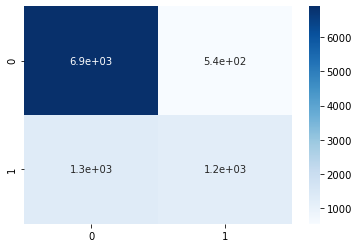

In [234]:
cm = confusion_matrix(y_test['active_in_month_6'],y_pred)
sns.heatmap(cm, annot=True,cmap ='Blues')
plt.show()

In [235]:
print(classification_report(y_test['active_in_month_6'], y_pred))

              precision    recall  f1-score   support

       False       0.84      0.93      0.88      7445
        True       0.69      0.48      0.57      2554

    accuracy                           0.81      9999
   macro avg       0.77      0.70      0.72      9999
weighted avg       0.80      0.81      0.80      9999



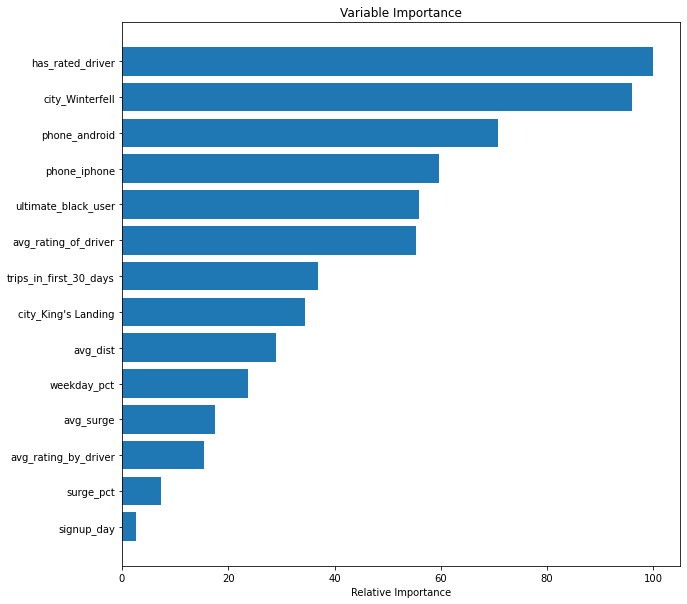

In [246]:
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx][::-1])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Overall, this model seems much better at predicting who will NOT stay, rather than who will. Which, in a sense gets a similar outcome.